## Equation-based Image Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@56e2115e

The `equation` op allows you to generate an image from a formula in JavaScript syntax.

Such images can be useful for testing without needing an external image source, or a long and bulky list of numbers. Note that the `Op` can be slow, so it is not great for any repetitive process.

In [2]:
ij.op().help('equation')

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.image.equation.DefaultEquation(
		IterableInterval out?,
		String in)

The `Op` takes an `IterableInterval` output, and a `String` equation that is evaluated in JavaScript. The equation can contain:

* image position (identified by `p[x]`, where x is the dimension we want the position from)
* numbers
* arithmetic operators (`+`, `-`, `*`, `/`, `%`)
* anything in the [JavaScript Math Package](https://www.javascripture.com/Math)

And for `BitType` images:

* comparison operators (`==`, `<`, `>`, `<=`, `>=`, `!=`)
* logical operators (`&&`, `||`, `!`) 
* bitwise operators (`&`, `|`, `^`, `~`, `<<`, `>>`, `>>>`)

Let's create a blank output image, and then populate it using `equation`

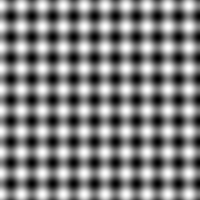

In [3]:
import net.imglib2.FinalInterval
import net.imglib2.type.numeric.integer.UnsignedByteType

dims = new FinalInterval(200, 200)
output = ij.op().create().img(dims, new UnsignedByteType())

formula = "63 * (Math.cos(0.3*p[0]) + Math.sin(0.3*p[1])) + 127"
ij.op().image().equation(output, formula)

ij.notebook().display(output)